## OpenTURNS

OpenTurns est, de tous points de vue, le module python le plus accessible et le mieux construit pour l'optimisation sous contrainte. On présente ci-dessous les méthodes générales de définition par étapes pour réussir à résoudre un problème avec les algos d'OpenTurns. 

Le module comprend la suite d'algorithme BONMIN (https://www.coin-or.org/Bonmin/), ainsi que PAGMO (https://esa.github.io/pagmo2/) et d'autres algorithmes d'optimisation linéaire tels que COBYLA ou IPOPT.

In [1]:
import openturns as ot
import matplotlib.pyplot as plt

dim = 2

# Fonction objectif, ici on est en multi-objectif
model = ot.SymbolicFunction(['x', 'y'], ['(x-1)^2+(y-2)^2', '(x+1)^2+(y-1)^2'])


bounds = ot.Interval([-5.0] * dim, [5.0] * dim)

problem = ot.OptimizationProblem(model)

problem.setBounds(bounds)

In [2]:
# Initialisation de la population
uniform = ot.ComposedDistribution([ot.Uniform(-5.0, 5.0)] * dim)

ot.RandomGenerator.SetSeed(0)

init_pop = uniform.getSample(63)

In [3]:
# Mise en place de l'algorithme
algo = ot.Pagmo(problem, 'nsga2', init_pop) 

algo.setMaximumIterationNumber(5) 
start = model.getCallsNumber()
algo.run() 
end = model.getCallsNumber()
result = algo.getResult() 

final_pop_x = result.getFinalPoints() 

final_pop_y = result.getFinalValues()

In [4]:
# Front de Pareto
front0 = result.getParetoFrontsIndices()[0] 

front0_x = final_pop_x.select(front0) 

front0_y = final_pop_y.select(front0) 
# nombre d'appels
print(end-start)

360


In [5]:
tab1 = [front0_y[i][0] for i in range (len(front0_y))]
tab2 = [front0_y[i][1] for i in range (len(front0_y))]

Text(0.5, 1.0, 'Front de Pareto')

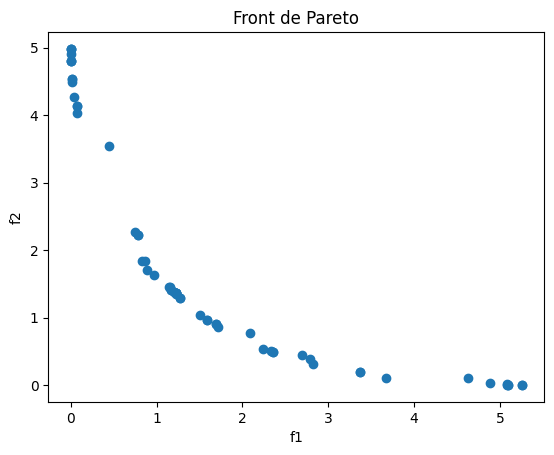

In [6]:
plt.scatter(tab1,tab2)
plt.xlabel('f1')
plt.ylabel('f2')
plt.title('Front de Pareto')